Import all the data into one

In [143]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
curr_date = dt.strptime("2020-01-02", "%Y-%m-%d")
end_date = dt.strptime("2020-12-31", "%Y-%m-%d")
vessels_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
vessels_df = vessels_df[vessels_df.fishing_hours != 0]
vessels_df = vessels_df[vessels_df.cell_ll_lat >= 23.5]
vessels_df = vessels_df[vessels_df.cell_ll_lat <= 50]
vessels_df = vessels_df[vessels_df.cell_ll_lon <= -60]
vessels_df = vessels_df[vessels_df.cell_ll_lon >= -100]
curr_date = curr_date + relativedelta(days=1)
while curr_date < end_date:
    temp_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
    # Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
    temp_df = temp_df[temp_df.fishing_hours != 0]
    temp_df = temp_df[temp_df.cell_ll_lat >= 23.5]
    temp_df = temp_df[temp_df.cell_ll_lat <= 50]
    temp_df = temp_df[temp_df.cell_ll_lon <= -60]
    temp_df = temp_df[temp_df.cell_ll_lon >= -100]
    vessels_df = pd.concat([vessels_df, temp_df])
    curr_date = curr_date + relativedelta(days=1)
    print(f'{curr_date:%Y-%m-%d}', end='\r')

vessels_df

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours
6462,2020-01-02,25.0,-82.5,367680570,14.1386,13.1827
6463,2020-01-02,25.0,-82.6,367680570,2.0897,2.0897
6899,2020-01-02,27.0,-83.0,367532970,1.7083,1.7083
6965,2020-01-02,28.0,-94.1,367743330,5.0741,4.8241
7040,2020-01-02,29.0,-89.9,366861460,13.6988,10.4994
...,...,...,...,...,...,...
87065,2020-12-30,31.8,-78.8,367719840,1.7255,0.2591
87659,2020-12-30,41.6,-68.6,368161410,0.2605,0.2605
87999,2020-12-30,43.6,-69.9,368016910,4.2641,2.1730
88000,2020-12-30,43.6,-69.2,368017040,7.3930,6.3683


In [144]:


dirty = pd.read_excel("AWOIS_Wrecks.xlsx")
dirty = dirty.loc[dirty["LATDEC"]>23.5]
dirty = dirty.loc[dirty["LATDEC"]<50]
dirty = dirty.loc[dirty["LONDEC"]<-60]
dirty = dirty.loc[dirty["LONDEC"]>-100]

display(dirty)

c:\Users\willi\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,RECRD,VESSLTERMS,FEATURE_TYPE,LATDEC,LONDEC,GP_QUALITY,DEPTH,SOUNDING_TYPE,YEARSUNK,HISTORY
0,14620,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",42.143528,-80.114556,High,18.0,Feet and tenths,NaN,F00542: S-W904-NRT4-07; Office review indica...
1,14292,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",41.498284,-81.759593,High,26.0,Feet and tenths,NaN,H11689/2007-- S-w920-NRT4-07; Dangerous sub...
2,14296,ALGERIA,"Wreck - Submerged, dangerous to surface naviga...",41.520448,-81.716076,High,32.0,Feet and tenths,NaN,H11689/2007-- S-W920-NRT4-07; A large subme...
3,14298,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",41.512713,-81.709879,High,22.0,Feet and tenths,NaN,H11689/2007-- S-W920-NRT4-07; A submerged w...
4,14207,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",42.993389,-82.426583,High,34.0,Feet and tenths,NaN,CL 1883/1999-- The Canadian Hydrographic Se...
...,...,...,...,...,...,...,...,...,...,...
6217,2886,NORHTEASTERN,Not Charted,35.091842,-75.557928,Poor,0.0,NaN,NaN,SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED
6218,2887,ARRAYO,Not Charted,34.983500,-76.051289,Poor,0.0,NaN,NaN,SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED
6219,2889,NORDAL,Not Charted,34.691842,-75.584597,Poor,0.0,NaN,NaN,_x000D_\nDESCRIPTION ...
6220,14917,USS VIRGINA,"Wreck - Submerged, nondangerous",35.019290,-75.285944,Med,103.0,Feet and tenths,1923.0,American Battleship of WWI vintage sunk during...


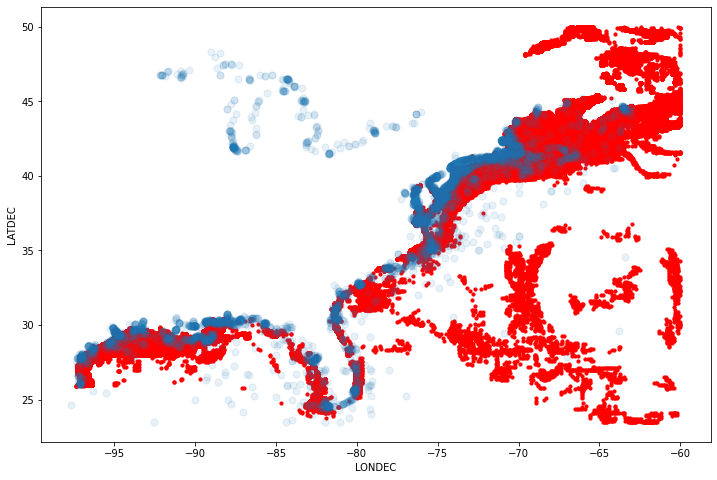

In [145]:
axes = vessels_df.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False)
axes= dirty.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=50,figsize=(12,8), alpha=0.1,sharex=False,ax=axes)


In [146]:
# This is the information given to us with the data
# ncols        9600
# nrows        6360
# xllcorner    -100.000000000000
# yllcorner    23.500000000000
# cellsize     0.004166666667
# NODATA_value -32767
cols = [-100 + i*0.004166666667 for i in range(9600)]
cols.insert(0, 'throwaway')
rows = [50 - i*0.004166666667 for i in range(6360)]
depth_df = pd.read_csv("./GEBCO_06_Nov_2022_e0f252343eb4/gebco_2022_n50.0_s23.5_w-100.0_e-60.0.asc", delimiter=" ", names=cols)
depth_df.index = rows
depth_df = depth_df.drop(columns="throwaway")
depth_df[depth_df > 0] = 500
depth_df

,-100.000000,-99.995833,-99.991667,-99.987500,-99.983333,-99.979167,-99.975000,-99.970833,-99.966667,-99.962500,...,-60.041667,-60.037500,-60.033333,-60.029167,-60.025000,-60.020833,-60.016667,-60.012500,-60.008333,-60.004167
50.000000,500,500,500,500,500,500,500,500,500,500,...,-149,-147,-133,-133,-133,-137,-131,-131,-134,-135
49.995833,500,500,500,500,500,500,500,500,500,500,...,-146,-145,-135,-127,-127,-131,-131,-131,-132,-132
49.991667,500,500,500,500,500,500,500,500,500,500,...,-149,-144,-136,-130,-130,-129,-129,-129,-127,-126
49.987500,500,500,500,500,500,500,500,500,500,500,...,-147,-143,-137,-133,-133,-131,-127,-127,-125,-124
49.983333,500,500,500,500,500,500,500,500,500,500,...,-141,-141,-138,-134,-134,-131,-129,-129,-128,-128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.520833,500,500,500,500,500,500,500,500,500,500,...,-5938,-5936,-5935,-5933,-5932,-5932,-5931,-5930,-5932,-5934
23.516667,500,500,500,500,500,500,500,500,500,500,...,-5938,-5937,-5935,-5934,-5933,-5932,-5932,-5931,-5933,-5934
23.512500,500,500,500,500,500,500,500,500,500,500,...,-5938,-5938,-5936,-5935,-5935,-5934,-5933,-5933,-5934,-5936
23.508333,500,500,500,500,500,500,500,500,500,500,...,-5939,-5939,-5938,-5937,-5936,-5936,-5935,-5935,-5936,-5937


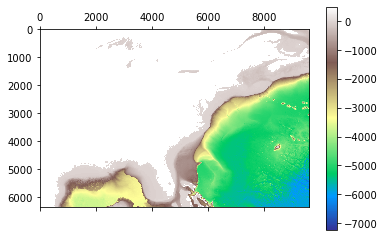

In [147]:
import matplotlib
plot = matplotlib.pyplot.matshow(depth_df, cmap="terrain")
plot.figure.colorbar(plot)

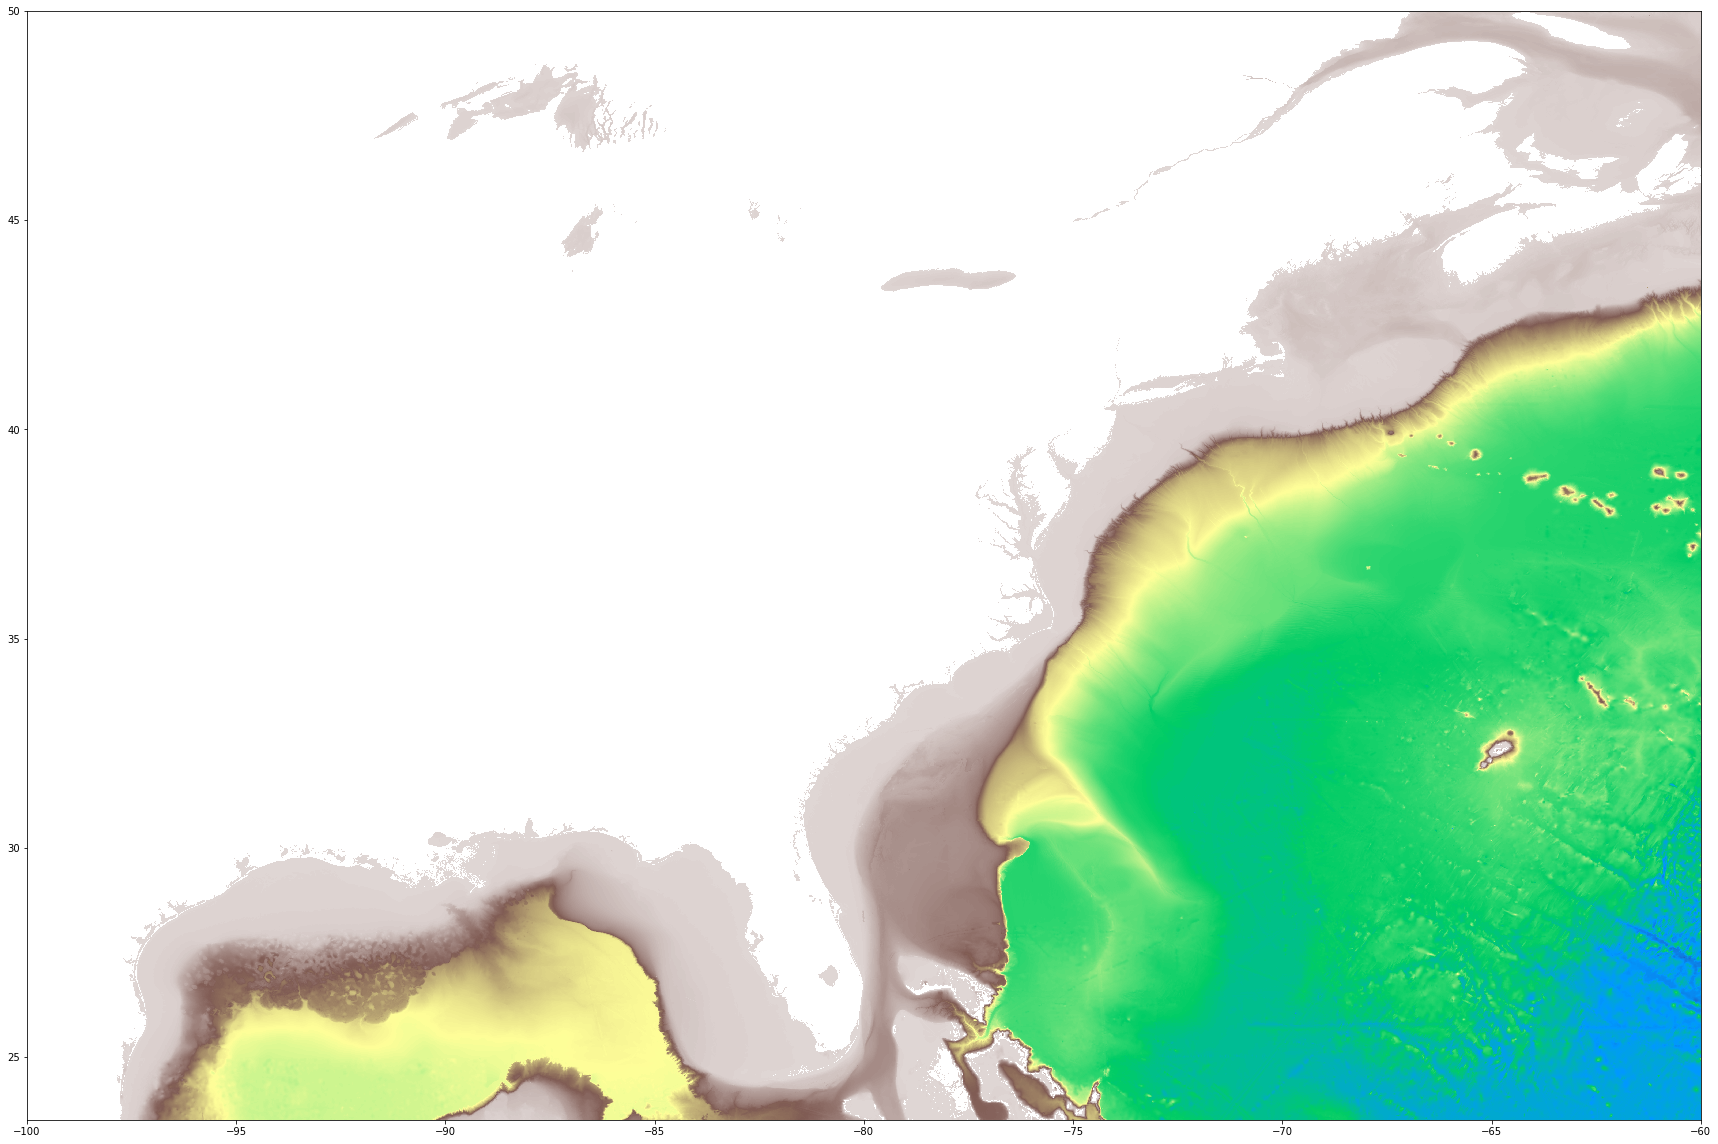

In [148]:
plot = matplotlib.pyplot.figure(figsize=(30, 30))
plot = matplotlib.pyplot.imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])